### Plotting one variable onto histogram

In [13]:
# plotting one variable onto a histogram

import uproot 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def Plot_Variable(files, variable):
    
    # Make the plot
    fig, ax = plt.subplots(1, figsize=(5, 3), dpi=150)
    bin_dict = {
        "all_invariant_masses" : [0, 240, 40, "Dijet mass [GeV]"],
        "b_mH_ZZ" : [0, 220, 40, "Branch for mH coming from two Z bosons"],
        "b_mZ1_jj" : [0, 165, 50, "Branch for mZ1 coming from two jets"],
        "b_mZ2_jj" : [0, 165, 50, "Branch for mZ2 coming from two jets"],
        "Additional_Variable_Here" : [0, 100, 100, "Variable x label [GeV]"], # xmin, xmax, nbins, xlabel
        "jet_e" : [0, 150, 150, "Jet energy [GeV]"]
    }
    variable_info = bin_dict[variable]
    xmin, xmax, nbins, xlabel = variable_info[0], variable_info[1], variable_info[2], variable_info[3] # set binning and x label
    nevents = 2000
    ylabel = "Entries"
    normalize = 1

    # For each file, add its histogram to the plot
    for f in files:    
        u_f = uproot.open(f) # open file with uproot
        tree = u_f["analysis"] # define events tree
        #t.keys() # print all branches # print all branches

        #takes all that is in the "variable" from the branch and arranges it into a numpy array
        variable_values = tree[variable].array(library="np")
        ## why do we take first n events only??
        variable_values = variable_values[:nevents] # take first nevents only
        variable_values = variable_values.flatten()
        #variable_values = np.concatenate(variable_values).ravel() # Flatten the array of arrays

        bins = np.linspace(xmin, xmax, nbins)  
        counts, bins = np.histogram(variable_values, bins=bins)
        avg, stdev = np.mean(variable_values), np.std(variable_values) # save average and standard deviation
        ## what is the purpose of this normalize thing?
        if(normalize): 
            counts = [c/nevents for c in counts]
            ylabel = "Entries (normalized)"
        legend_entry = f.replace(".root", "")
        ax.hist(bins[:-1], bins, weights=counts, label = legend_entry, histtype='step') 

    fontsize = 13
    # Set axis labels with custom font size - 
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize) # make the tick label sizes larger as well, so that others will be able to see when you share the plot
    plt.legend(fontsize = 4, loc = 'upper right')
    
    fig.tight_layout()
    fig.show()

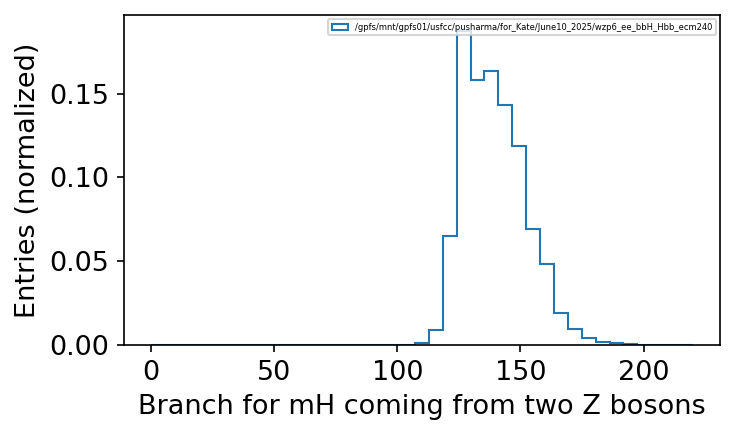

In [2]:
Plot_Variable(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root"], "b_mH_ZZ")

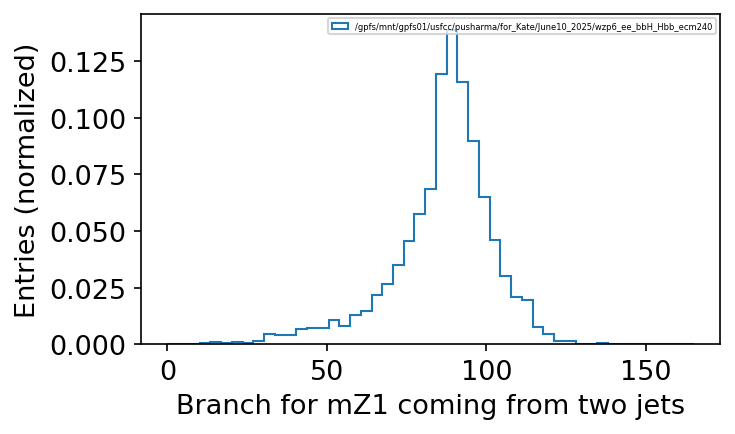

In [3]:
Plot_Variable(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root"], "b_mZ1_jj")

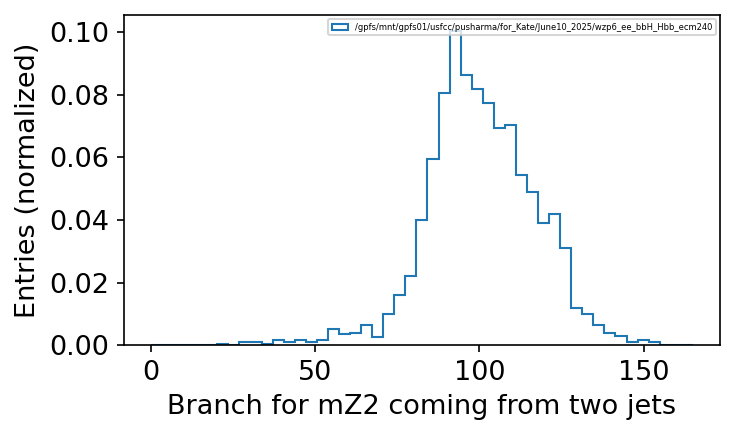

In [4]:
Plot_Variable(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root"], "b_mZ2_jj")

### Plotting first three var signal and background onto histogram

In [14]:
import uproot 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def Plot_Variable_Together(files, variable):
    
    # Make the plot
    fig, ax = plt.subplots(1, figsize=(5, 3), dpi=150)
    bin_dict = {
        "all_invariant_masses" : [0, 240, 40, "Dijet mass [GeV]"],
        "b_mH_ZZ" : [0, 220, 40, "Branch for mH coming from two Z bosons"],
        "b_mZ1_jj" : [0, 165, 50, "Branch for mZ1 coming from two jets"],
        "b_mZ2_jj" : [0, 165, 50, "Branch for mZ2 coming from two jets"],
        "Additional_Variable_Here" : [0, 100, 100, "Variable x label [GeV]"], # xmin, xmax, nbins, xlabel
        "jet_e" : [0, 150, 150, "Jet energy [GeV]"]
    }
    variable_info = bin_dict[variable]
    xmin, xmax, nbins, xlabel = variable_info[0], variable_info[1], variable_info[2], variable_info[3] # set binning and x label
    nevents = 2000
    ylabel = "Entries"
    normalize = 1

    # For each file, add its histogram to the plot
    for f in files:    
        u_f = uproot.open(f) # open file with uproot
        tree = u_f["analysis"] # define events tree
        #t.keys() # print all branches # print all branches

        #takes all that is in the "variable" from the branch and arranges it into a numpy array
        variable_values = tree[variable].array(library="np")
        variable_values = variable_values[:nevents] # take first nevents only
        variable_values = variable_values.flatten()
        #variable_values = np.concatenate(variable_values).ravel() # Flatten the array of arrays

        bins = np.linspace(xmin, xmax, nbins)  
        counts, bins = np.histogram(variable_values, bins=bins)
        avg, stdev = np.mean(variable_values), np.std(variable_values) # save average and standard deviation
        if(normalize): 
            counts = [c/nevents for c in counts]
            ylabel = "Entries (normalized)"
        legend_entry = f.replace(".root", "")
        ax.hist(bins[:-1], bins, weights=counts, label = legend_entry, histtype='step') 

    fontsize = 13
    # Set axis labels with custom font size - 
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize) # make the tick label sizes larger as well, so that others will be able to see when you share the plot
    plt.legend(fontsize = 4, loc = 'upper right')
    
    fig.tight_layout()
    fig.show()

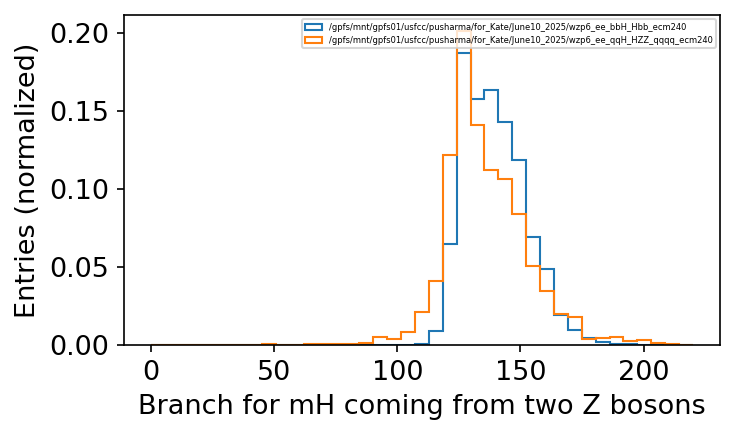

In [7]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mH_ZZ") 

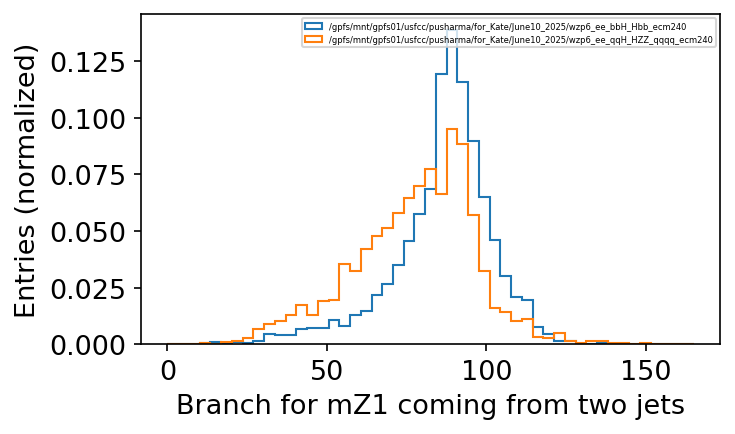

In [8]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mZ1_jj") 

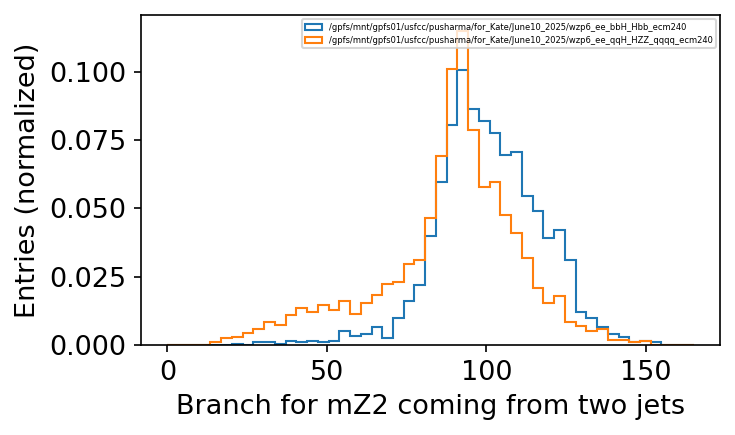

In [9]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mZ2_jj") 

### BDT training and testing for one signal one background

In [37]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [98]:
file1 = "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root"
file2 = "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"

# turning the two analysis TTrees from the two ROOT files into pd dataframes
# file 1
u_f1 = uproot.open(file1)
tree1 = u_f1["analysis"]
df1 = tree1.arrays(tree1.keys(), library="pd")
df1['Label'] = 0

#file 2
u_f2 = uproot.open(file2)
tree2 = u_f2["analysis"]
df2 = tree2.arrays(tree2.keys(), library="pd")
df2['Label'] = 1

# combining those two dataframes into one dataframe
df = pd.concat([df1, df2])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.30, random_state = 15)

# training dataset - separating data vs training columns - but without b_w
X_train = train[tree1.keys()[:-1]]
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test[tree2.keys()[:-1]]
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 15, max_features = 5)
print(gbc.fit(X_train, y_train))

y_pred = gbc.predict_proba(X_test)

GradientBoostingClassifier(max_features=5, random_state=15)


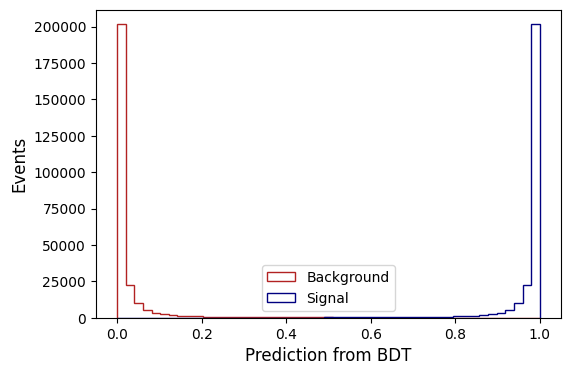

In [99]:
prob_bac = y_pred[:, 0]
prob_sig = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_bac, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Background')
plt.hist(prob_sig, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

In [59]:
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics

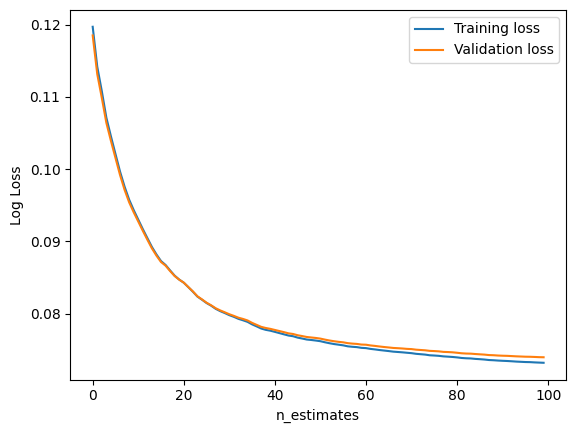

In [101]:
log_losses_train = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss_train = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses_train.append(loss_train)

log_losses_test = []
for y_pred in gbc.staged_predict_proba(X_test):
    loss_test = sklearn.metrics.log_loss(y_test, y_pred)
    log_losses_test.append(loss_test)

plt.plot(log_losses_train, label='Training loss')
plt.plot(log_losses_test, label='Validation loss')
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

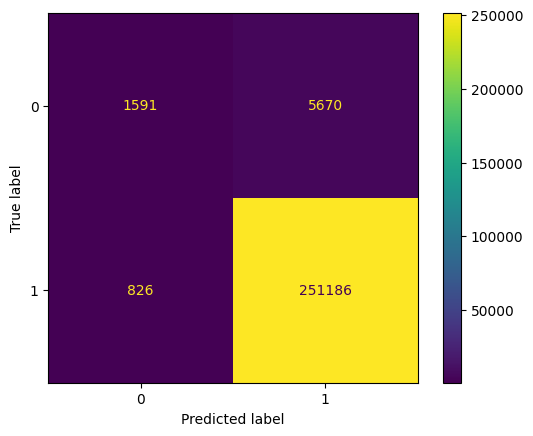

In [67]:
y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

AUC score:  0.9460295933315592


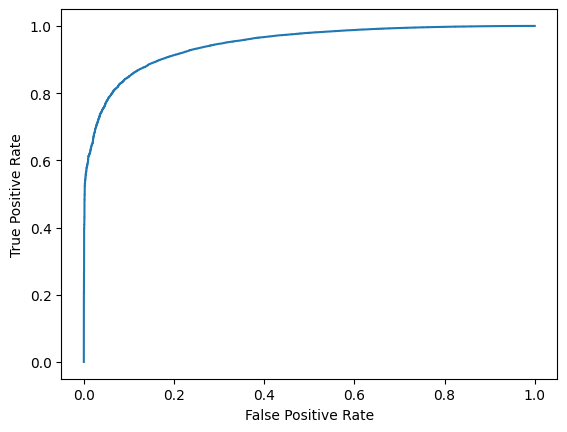

In [76]:
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

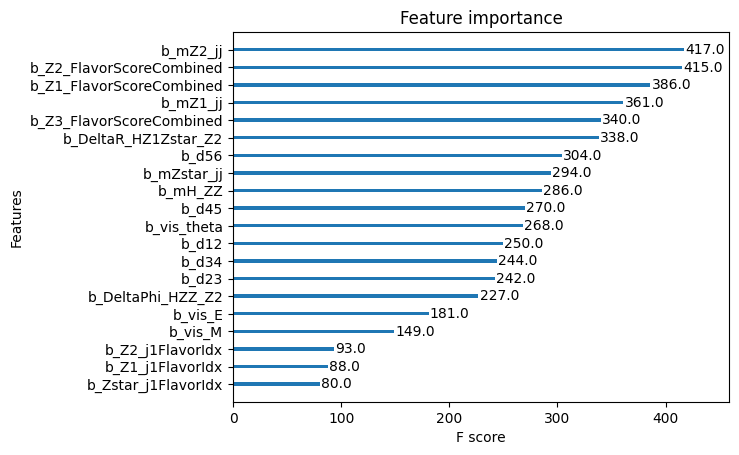

In [77]:
# using xgb

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)

### Plotting all variables: one signal one background

In [10]:
import uproot 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def Plot_Variable_Together(files, variable):
    
    # Make the plot
    fig, ax = plt.subplots(1, figsize=(5, 3), dpi=150)
    
    xmin, nbins = 0, 40 # set binning
    label_dict = {
        "b_mH_ZZ": ['mH_ZZ (GeV)'],
        "b_mZ1_jj": ['mZ1_jj (GeV)'],
        "b_mZ2_jj": ['mZ2_jj (GeV)'],
        "b_mZstar_jj": ['mZstar_jj (GeV)'],
        "b_Z1_j1FlavorIdx": ['Z1_j1FlavorIdx'],
        "b_Z1_j2FlavorIdx": ['Z1_j2FlavorIdx'],
        "b_Z1_FlavorScoreCombined": ['Z1_FlavorScoreCombined'],
        "b_Z2_FlavorScoreCombined": ['Z2_FlavorScoreCombined'],
        "b_Z3_FlavorScoreCombined": ['Z3_FlavorScoreCombined'],
        "b_Z2_j1FlavorIdx": ['Z2_j1FlavorIdx'],
        "b_Z2_j2FlavorIdx": ['Z2_j2FlavorIdx'],
        "b_Zstar_j1FlavorIdx": ['Zstar_j1FlavorIdx'],
        "b_Zstar_j2FlavorIdx": ['Zstar_j2FlavorIdx'],
        "b_DeltaR_HZ1Zstar_Z2": ['DeltaR_HZ1Zstar_Z2'],
        "b_DeltaPhi_HZZ_Z2": ['DeltaPhi_HZZ_Z2 (rad)'],
        "b_d12": ['d12 ( )'],
        "b_d23": ['d23 ( )'],
        "b_d34": ['d34 ( )'],
        "b_d45": ['d45 ( )'],
        "b_d56": ['d56 ( )'],
        "b_vis_E": ['vis_E (GeV)'],
        "b_vis_M": ['vis_M (GeV)'],
        "b_vis_theta": ['vis_theta (rad)']
    }

    nevents = 2000
    ylabel = "Entries"
    normalize = 1
    x_info = label_dict[variable]
    xlabel = x_info[0]

    # For each file, add its histogram to the plot
    for f in files:    
        u_f = uproot.open(f) # open file with uproot
        tree = u_f["analysis"] # define events tree
        #t.keys() # print all branches # print all branches

        array = tree[variable].array(library="pd")
        xmax = max(array) * 1.025

        #takes all that is in the "variable" from the branch and arranges it into a numpy array
        variable_values = tree[variable].array(library="np")
        variable_values = variable_values[:nevents] # take first nevents only
        variable_values = variable_values.flatten()
        #variable_values = np.concatenate(variable_values).ravel() # Flatten the array of arrays

        bins = np.linspace(xmin, xmax, nbins)  
        counts, bins = np.histogram(variable_values, bins=bins)
        avg, stdev = np.mean(variable_values), np.std(variable_values) # save average and standard deviation
        if(normalize): 
            counts = [c/nevents for c in counts]
            ylabel = "Entries (normalized)"
        legend_entry = f.replace(".root", "")
        ax.hist(bins[:-1], bins, weights=counts, label = legend_entry, histtype='step') 

    fontsize = 13
    # Set axis labels with custom font size - 
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize) # make the tick label sizes larger as well, so that others will be able to see when you share the plot
    plt.legend(fontsize = 4, loc = 'upper right')
    
    fig.tight_layout()
    fig.show()

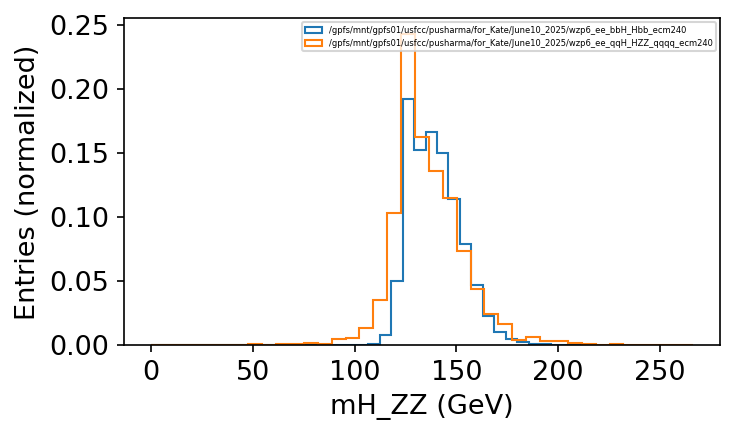

In [11]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mH_ZZ") 

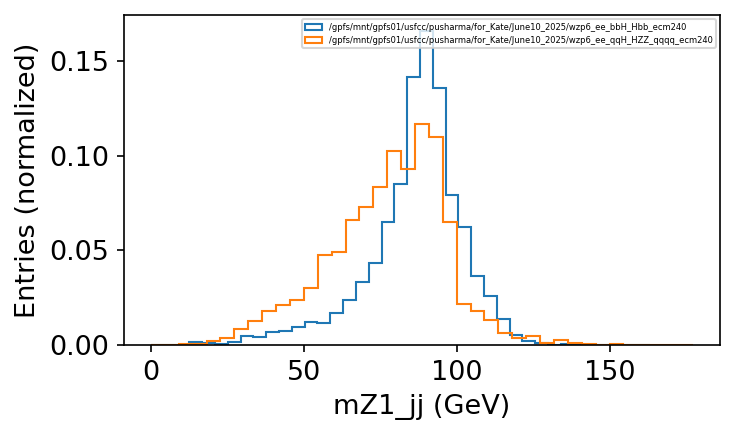

In [12]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mZ1_jj") 

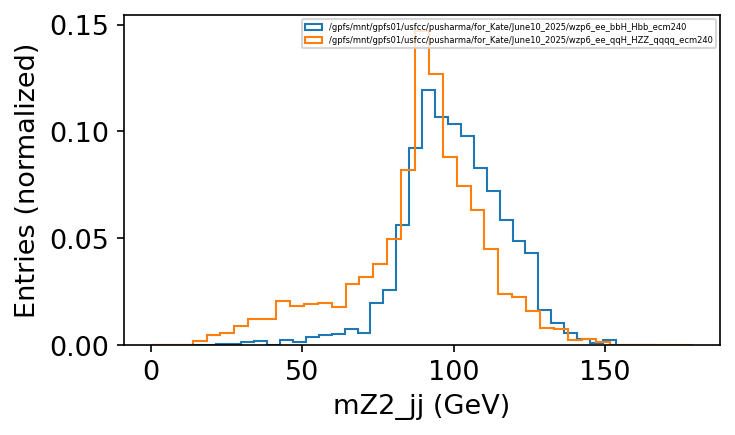

In [13]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mZ2_jj") 

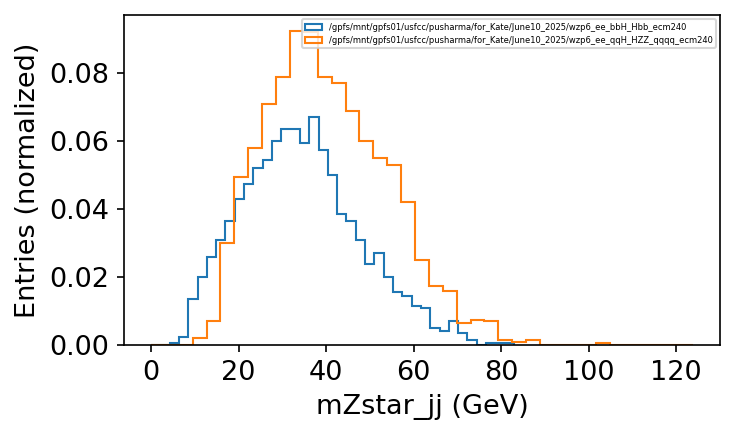

In [14]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mZstar_jj") 

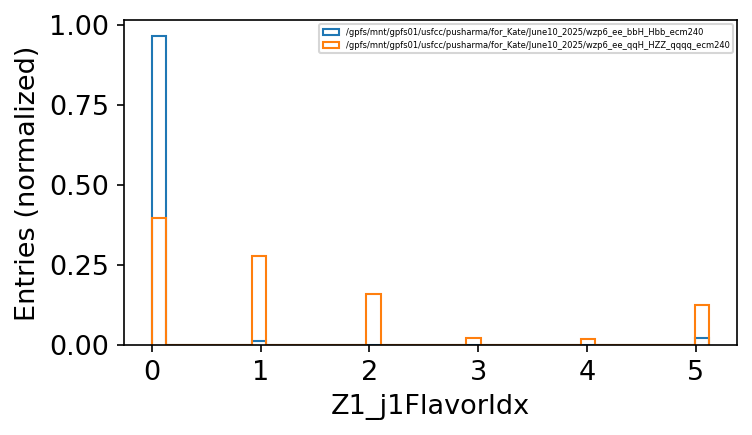

In [15]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Z1_j1FlavorIdx") 

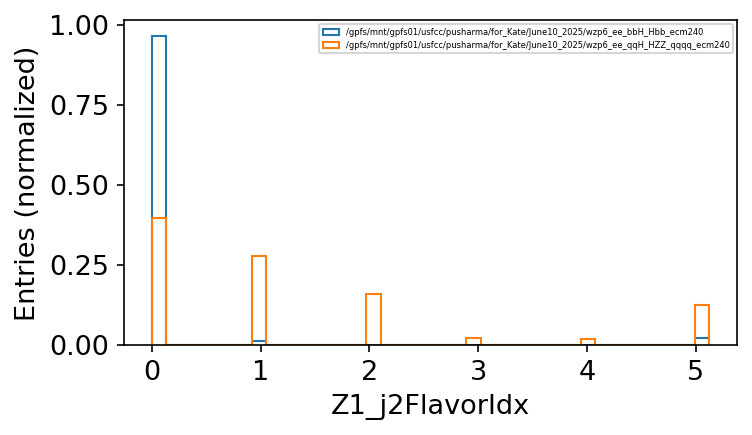

In [16]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Z1_j2FlavorIdx") 

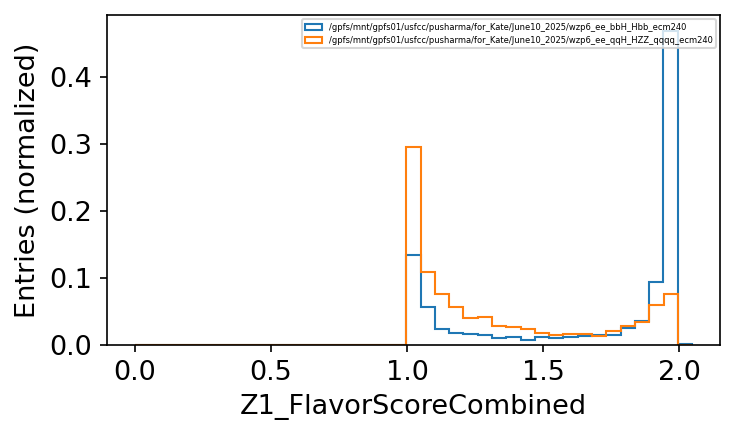

In [17]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Z1_FlavorScoreCombined") 

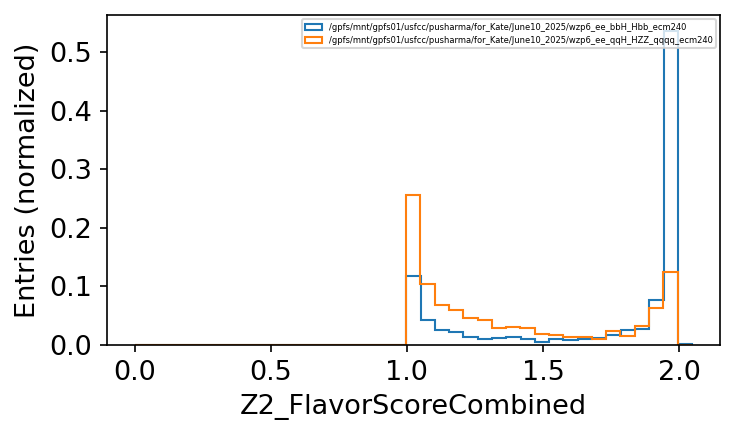

In [18]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Z2_FlavorScoreCombined") 

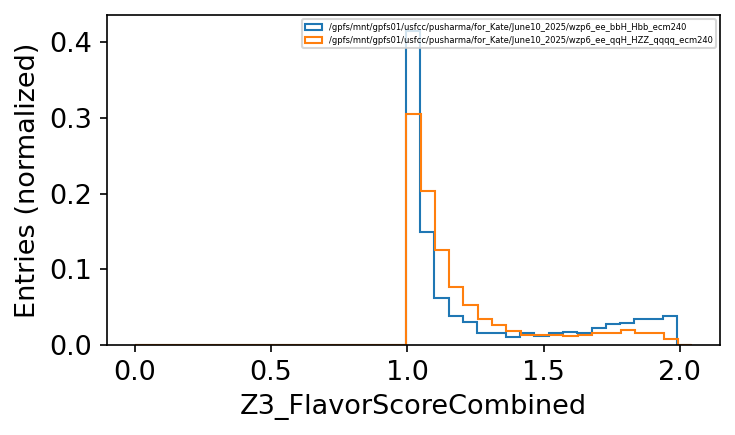

In [19]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Z3_FlavorScoreCombined") 

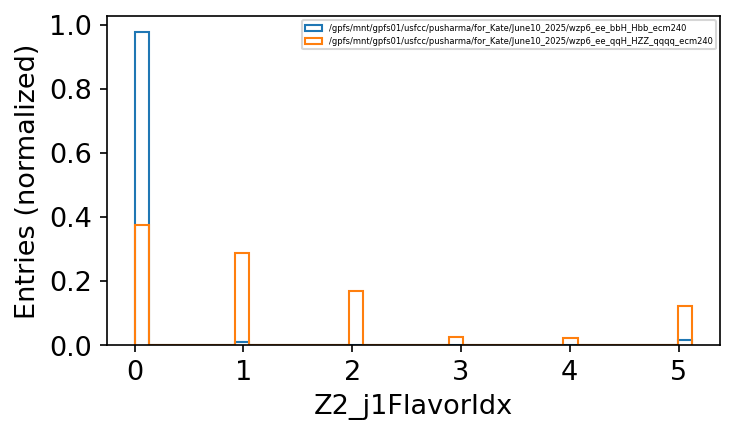

In [20]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Z2_j1FlavorIdx") 

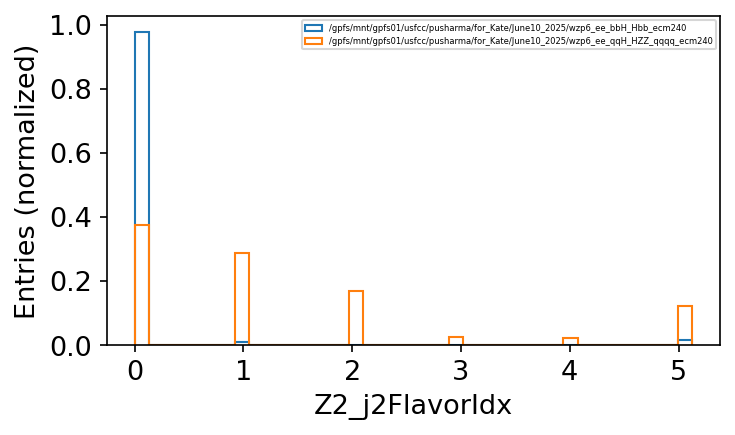

In [21]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Z2_j2FlavorIdx") 

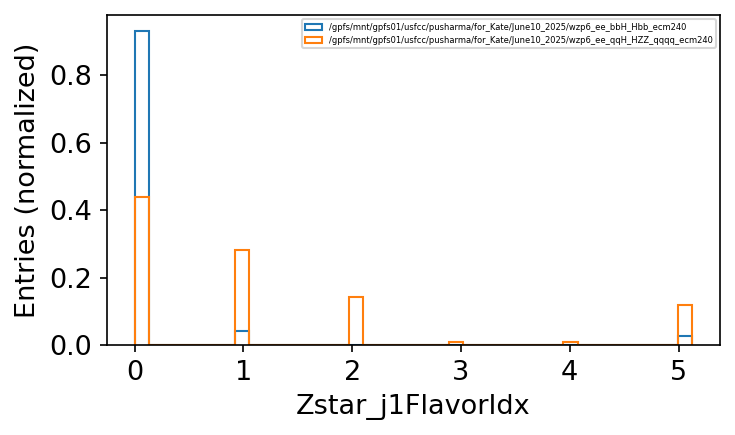

In [22]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Zstar_j1FlavorIdx") 

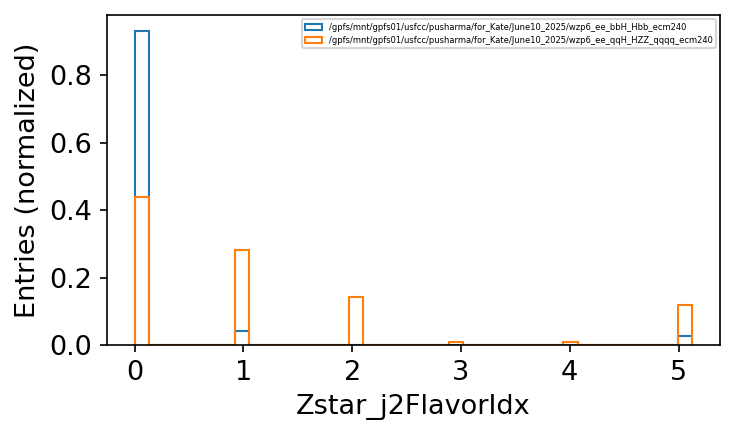

In [23]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Zstar_j2FlavorIdx") 

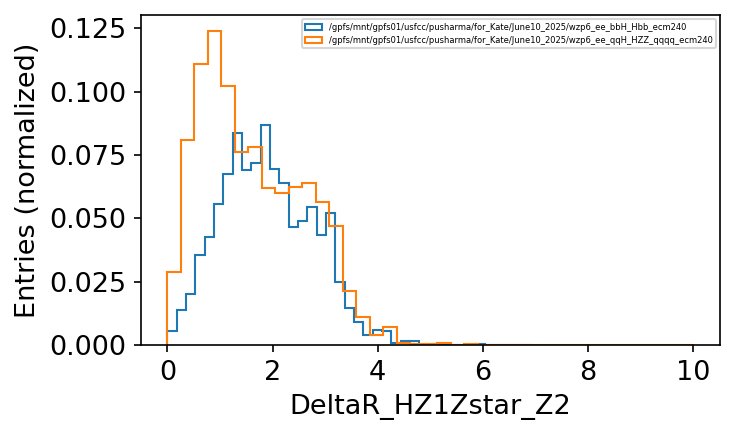

In [24]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_DeltaR_HZ1Zstar_Z2") 

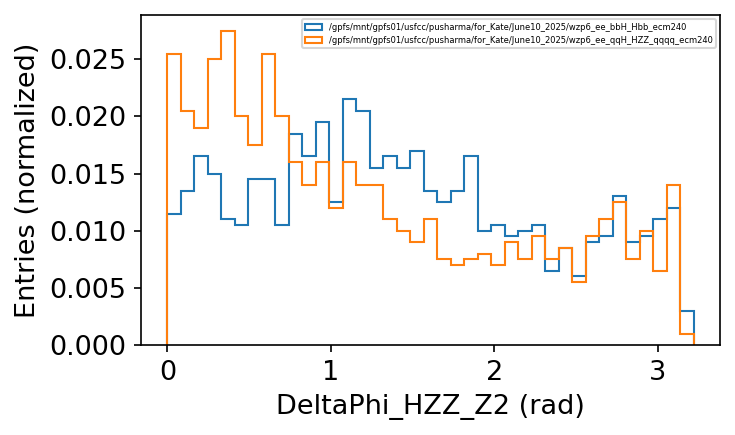

In [25]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_DeltaPhi_HZZ_Z2") 

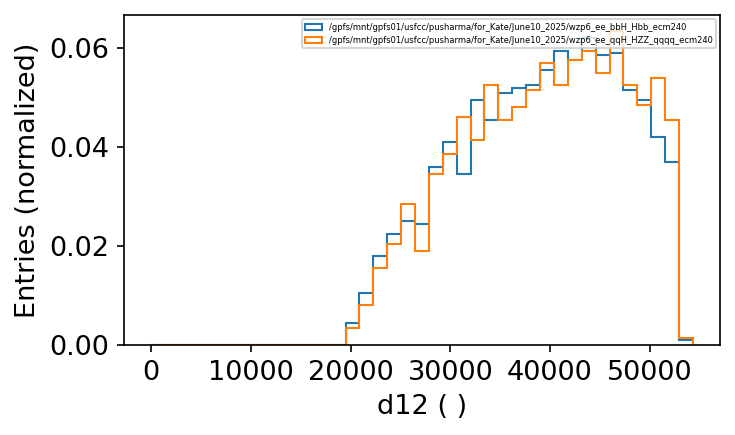

In [26]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_d12") 

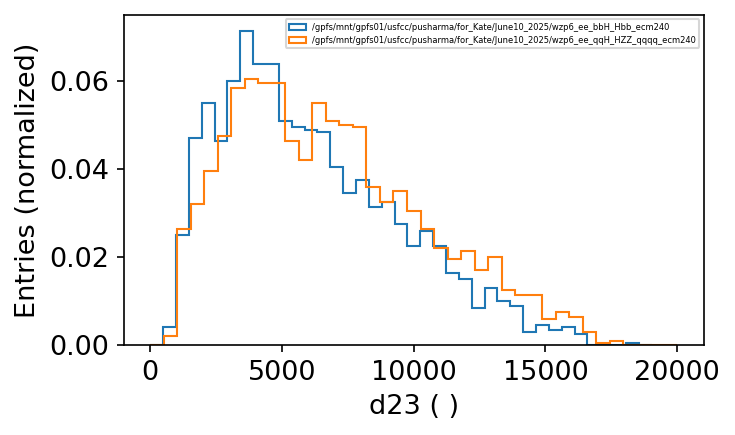

In [27]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_d23") 

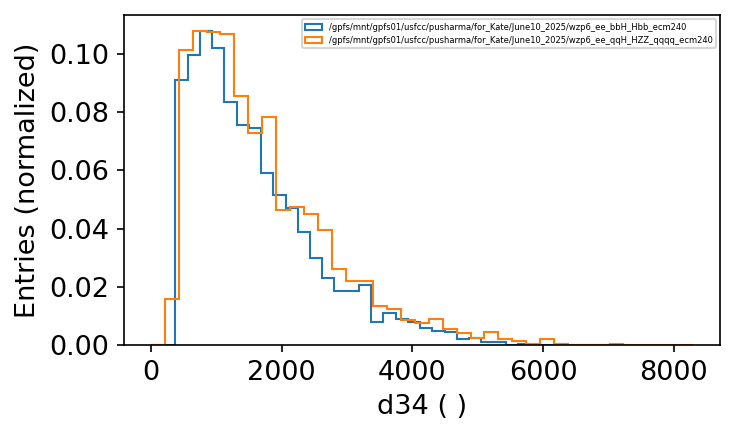

In [28]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_d34") 

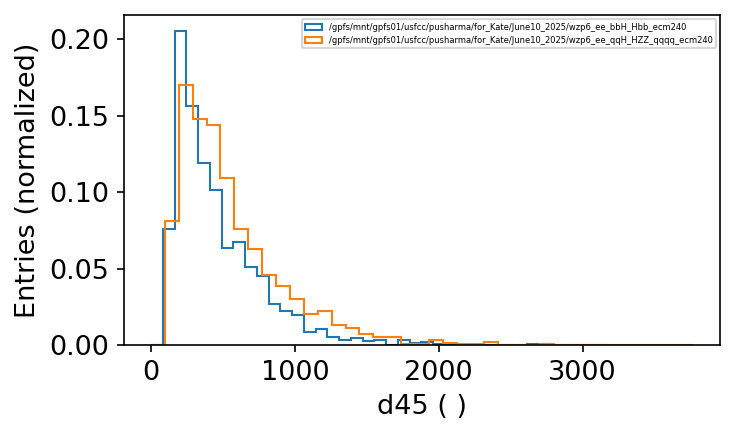

In [29]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_d45") 

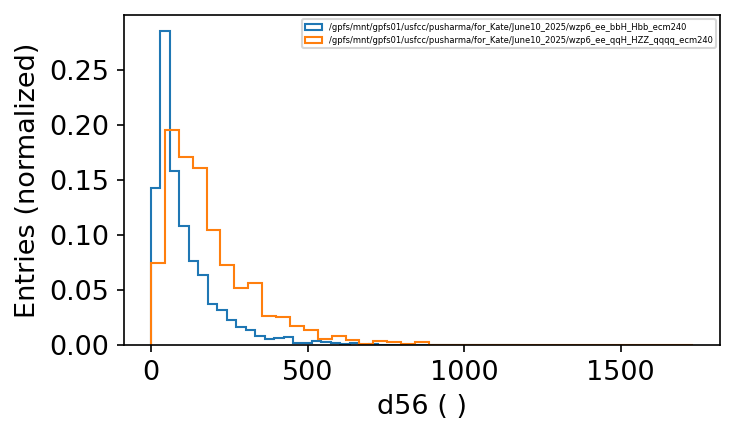

In [30]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_d56") 

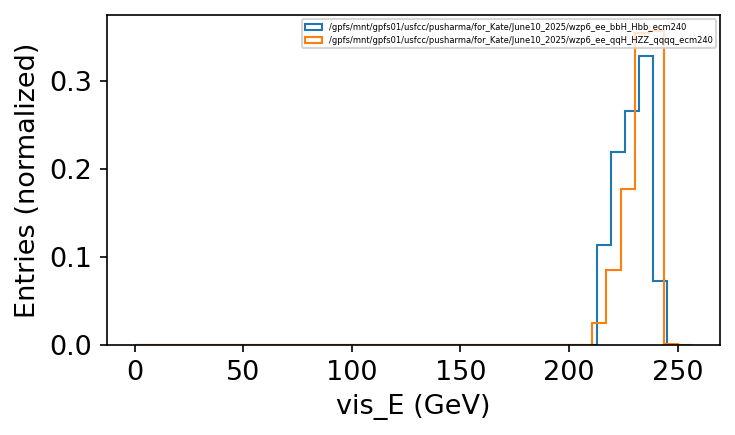

In [31]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_vis_E") 

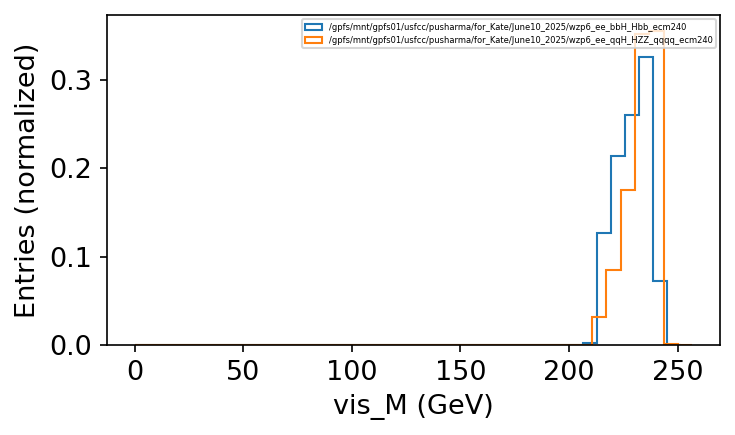

In [32]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_vis_M") 

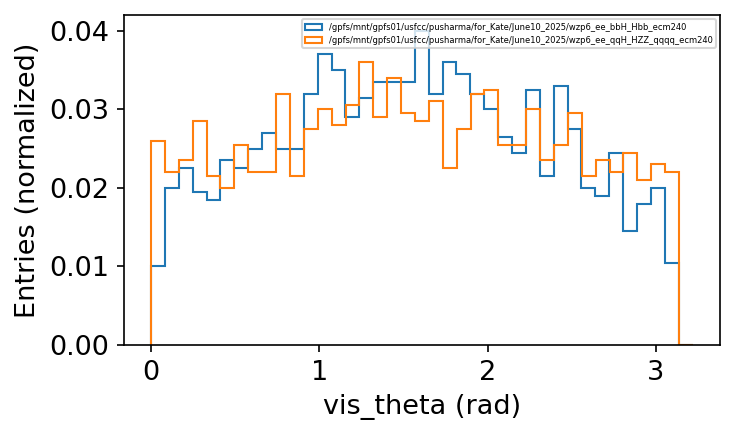

In [33]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_vis_theta") 

### Working on training BDT for five background files

#### Training BDT for one signal five background

In [64]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

back1 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root'
back2 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root'
back3 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root'
back4 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root'
back5 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root'
signal_file = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'

# background
back_file = [back1, back2, back3, back4, back5]
combined_background_df = pd.DataFrame()

for b in back_file: 
    # opening all the background files
    background = uproot.open(b)
    background_tree = background["analysis"]
    background_df = background_tree.arrays(background_tree.keys(), library="pd")
    background_df['Label'] = 0
        
    # combining all background files
    combined_background_df = pd.concat([background_df, combined_background_df])

# signal
signal = uproot.open(signal_file)
signal_tree = signal["analysis"]
signal_df = signal_tree.arrays(signal_tree.keys(), library="pd")
signal_df['Label'] = 1

# combining those two dataframes into one dataframe
df = pd.concat([combined_background_df, signal_df])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.35, random_state = 15)

# training dataset - separating data vs training columns - but without b_w
X_train = train.drop(columns=['b_w', 'Label'])
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test.drop(columns=['b_w', 'Label'])
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state = 15, max_features = 5)
gbc.fit(X_train, y_train)

y_pred = gbc.predict_proba(X_test)

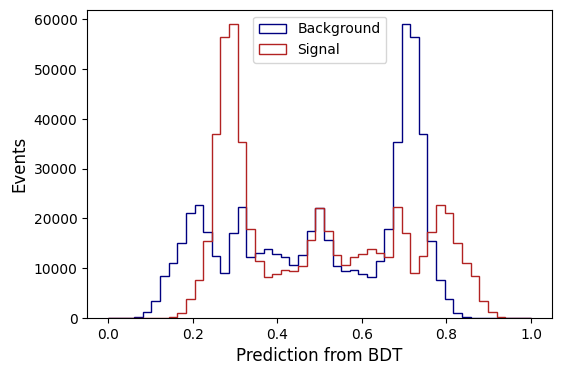

In [65]:
prob_back = y_pred[:, 0]
prob_sign = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_back, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Background')
plt.hist(prob_sign, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

In [59]:
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics

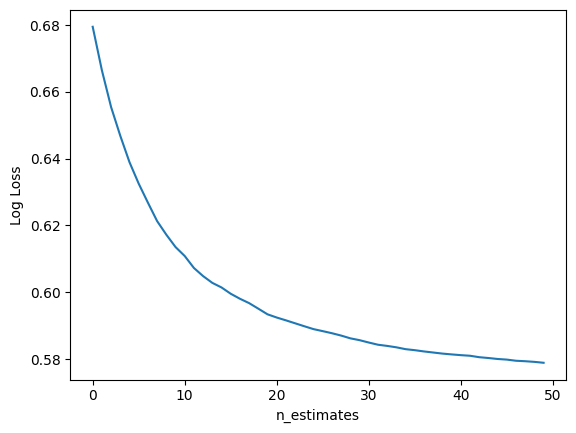

In [66]:
log_losses_train = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss_train = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses_train.append(loss_train)

plt.plot(log_losses_train)
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.show()

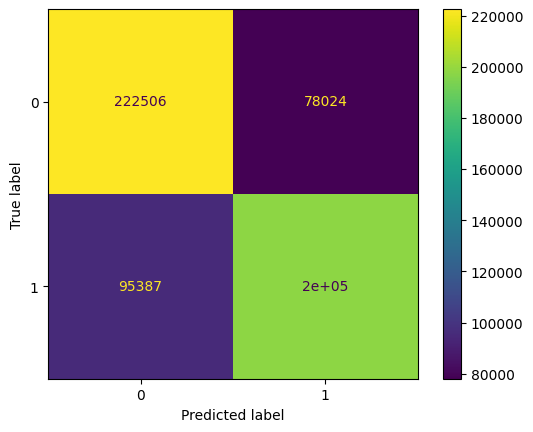

In [67]:
y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

AUC score:  0.766002599168727


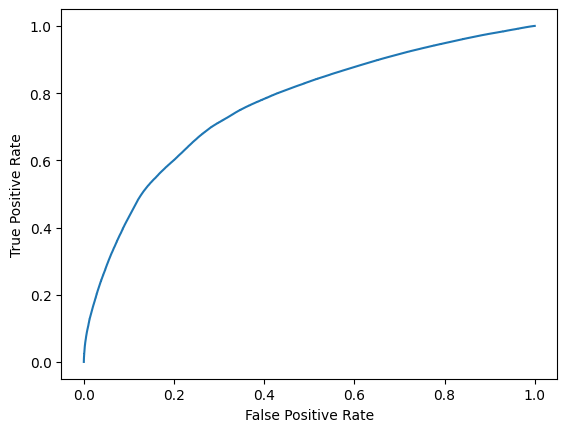

In [68]:
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

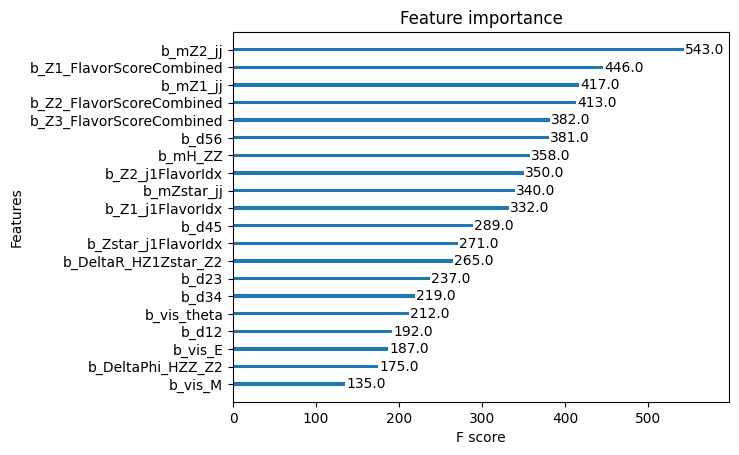

In [69]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)

#### Running the code with one background file

In [70]:
back1 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root'
back2 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root'
back3 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root'
back4 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root'
back5 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root'
signal_file = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'

# background
#back_file = [back1, back2, back3, back4, back5]
back_file = [back1]
combined_background_df = pd.DataFrame()

for b in back_file: 
    # opening all the background files
    background = uproot.open(b)
    background_tree = background["analysis"]
    background_df = background_tree.arrays(background_tree.keys(), library="pd")
    background_df['Label'] = 0
        
    # combining all background files
    combined_background_df = pd.concat([background_df, combined_background_df])

# signal
signal = uproot.open(signal_file)
signal_tree = signal["analysis"]
signal_df = signal_tree.arrays(signal_tree.keys(), library="pd")
signal_df['Label'] = 1

# combining those two dataframes into one dataframe
df = pd.concat([combined_background_df, signal_df])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.35, random_state = 15)

# training dataset - separating data vs training columns - but without b_w
X_train = train.drop(columns=['b_w', 'Label'])
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test.drop(columns=['b_w', 'Label'])
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05, random_state = 15, max_features = 5, max_depth = 10, verbose = 1)
gbc.fit(X_train, y_train)


y_pred = gbc.predict_proba(X_test)

      Iter       Train Loss   Remaining Time 
         1           0.7117           10.56m
         2           0.6875           10.64m
         3           0.6672           10.32m
         4           0.6496           10.42m
         5           0.6341           10.38m
         6           0.6200           10.31m
         7           0.6076           10.13m
         8           0.5959           10.00m
         9           0.5852            9.90m
        10           0.5757            9.86m
        20           0.5089            8.82m
        30           0.4721            7.71m
        40           0.4494            6.59m
        50           0.4335            5.51m
        60           0.4224            4.40m
        70           0.4137            3.30m
        80           0.4066            2.22m
        90           0.4010            1.11m
       100           0.3962            0.00s


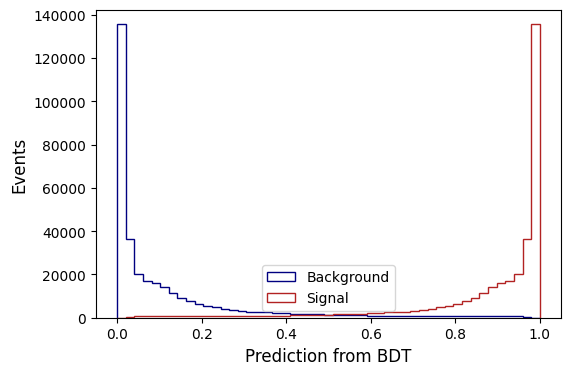

In [71]:
prob_back = y_pred[:, 0]
prob_sign = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_back, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Background')
plt.hist(prob_sign, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

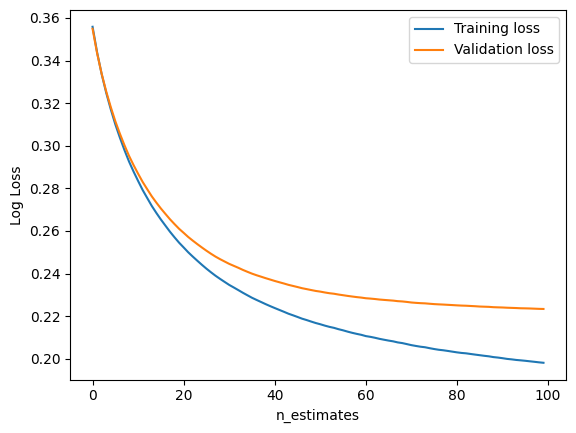

In [76]:
log_losses_train = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss_train = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses_train.append(loss_train)

log_losses_test = []
for y_pred in gbc.staged_predict_proba(X_test):
    loss_test = sklearn.metrics.log_loss(y_test, y_pred)
    log_losses_test.append(loss_test)

plt.plot(log_losses_train, label='Training loss')
plt.plot(log_losses_test, label='Validation loss')
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

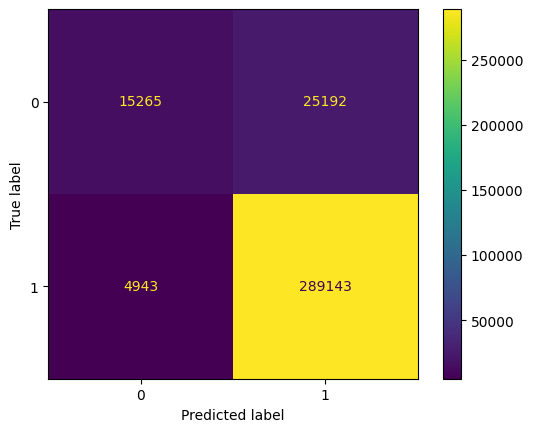

In [77]:
y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

AUC score:  0.9074554561428647


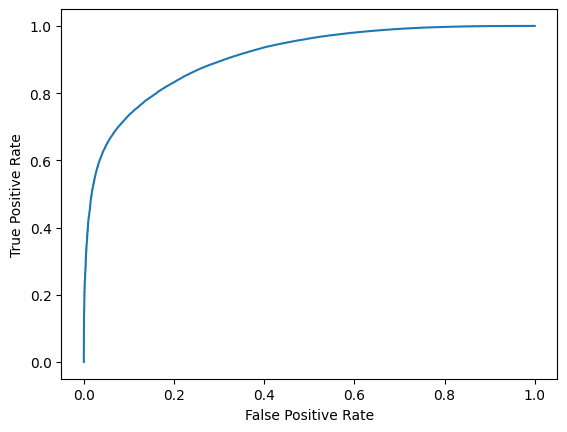

In [78]:
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

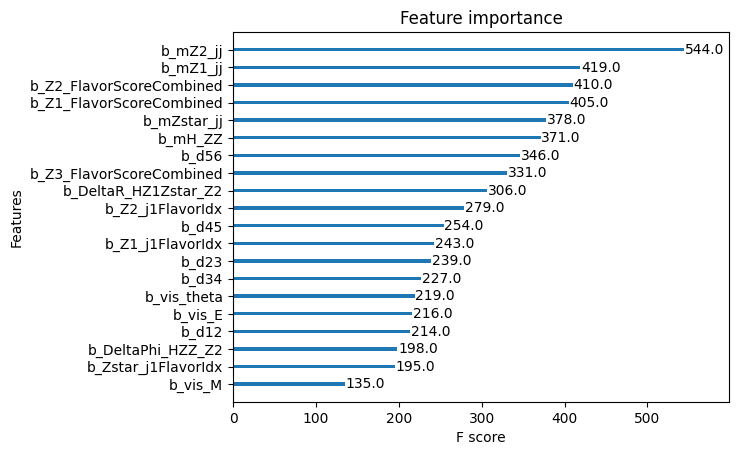

In [79]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)

#### Two background files

In [80]:
back1 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root'
back2 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root'
back3 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root'
back4 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root'
back5 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root'
signal_file = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'

# background
#back_file = [back1, back2, back3, back4, back5]
back_file = [back1, back2]
combined_background_df = pd.DataFrame()

for b in back_file: 
    # opening all the background files
    background = uproot.open(b)
    background_tree = background["analysis"]
    background_df = background_tree.arrays(background_tree.keys(), library="pd")
    background_df['Label'] = 0
        
    # combining all background files
    combined_background_df = pd.concat([background_df, combined_background_df])

# signal
signal = uproot.open(signal_file)
signal_tree = signal["analysis"]
signal_df = signal_tree.arrays(signal_tree.keys(), library="pd")
signal_df['Label'] = 1

# combining those two dataframes into one dataframe
df = pd.concat([combined_background_df, signal_df])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.35, random_state = 15)

# training dataset - separating data vs training columns - but without b_w
X_train = train.drop(columns=['b_w', 'Label'])
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test.drop(columns=['b_w', 'Label'])
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05, random_state = 15, max_features = 5, max_depth = 10, verbose = 1)
gbc.fit(X_train, y_train)

y_pred = gbc.predict_proba(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.1015           13.37m
         2           1.0850           13.03m
         3           1.0703           12.68m
         4           1.0580           12.65m
         5           1.0457           12.69m
         6           1.0344           12.65m
         7           1.0246           12.52m
         8           1.0145           12.31m
         9           1.0056           12.07m
        10           0.9978           11.97m
        20           0.9385           10.60m
        30           0.9033            9.14m
        40           0.8813            7.82m
        50           0.8660            6.55m
        60           0.8535            5.23m
        70           0.8439            3.93m
        80           0.8358            2.62m
        90           0.8274            1.31m
       100           0.8199            0.00s


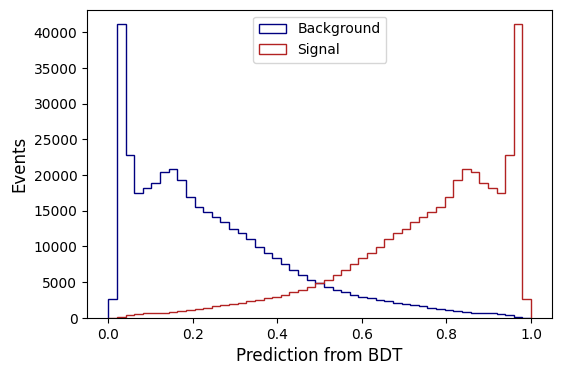

In [81]:
prob_back = y_pred[:, 0]
prob_sign = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_back, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Background')
plt.hist(prob_sign, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

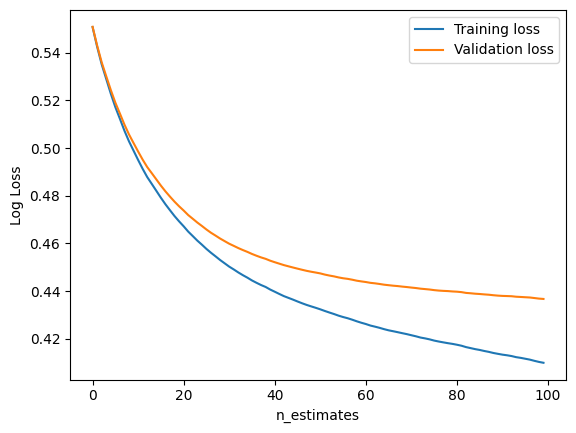

In [82]:
log_losses_train = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss_train = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses_train.append(loss_train)

log_losses_test = []
for y_pred in gbc.staged_predict_proba(X_test):
    loss_test = sklearn.metrics.log_loss(y_test, y_pred)
    log_losses_test.append(loss_test)

plt.plot(log_losses_train, label='Training loss')
plt.plot(log_losses_test, label='Validation loss')
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

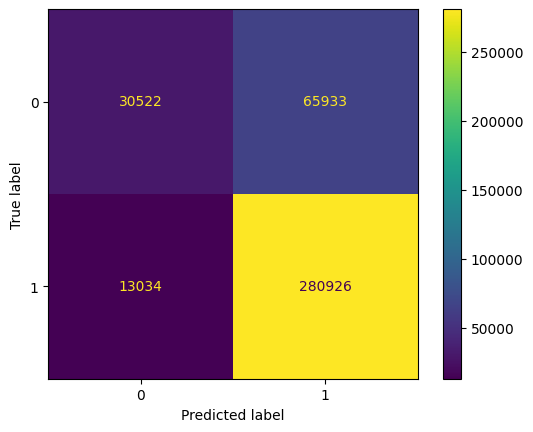

In [83]:
y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

AUC score:  0.8069007783610302


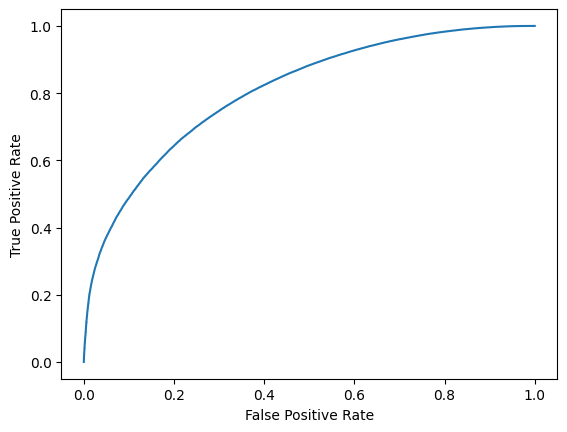

In [84]:
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

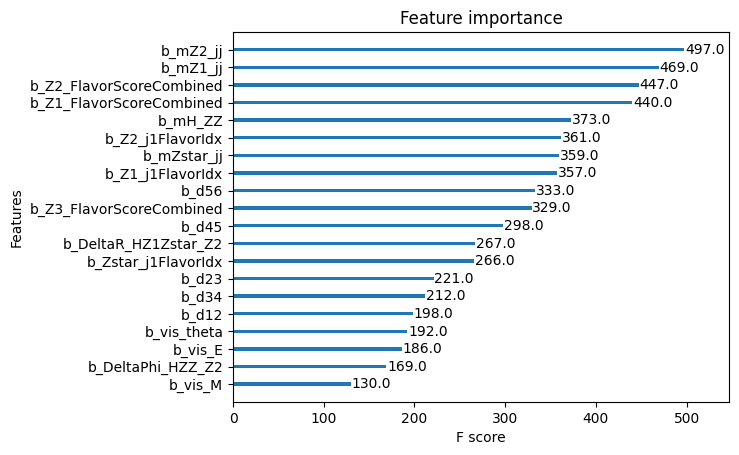

In [85]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)

#### Three background files

In [86]:
back1 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root'
back2 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root'
back3 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root'
back4 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root'
back5 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root'
signal_file = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'

# background
#back_file = [back1, back2, back3, back4, back5]
back_file = [back1, back2, back3]
combined_background_df = pd.DataFrame()

for b in back_file: 
    # opening all the background files
    background = uproot.open(b)
    background_tree = background["analysis"]
    background_df = background_tree.arrays(background_tree.keys(), library="pd")
    background_df['Label'] = 0
        
    # combining all background files
    combined_background_df = pd.concat([background_df, combined_background_df])

# signal
signal = uproot.open(signal_file)
signal_tree = signal["analysis"]
signal_df = signal_tree.arrays(signal_tree.keys(), library="pd")
signal_df['Label'] = 1

# combining those two dataframes into one dataframe
df = pd.concat([combined_background_df, signal_df])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.35, random_state = 15)

# training dataset - separating data vs training columns - but without b_w
X_train = train.drop(columns=['b_w', 'Label'])
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test.drop(columns=['b_w', 'Label'])
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05, random_state = 15, max_features = 5, max_depth = 10, verbose = 1)
gbc.fit(X_train, y_train)

y_pred = gbc.predict_proba(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3459           18.11m
         2           1.3180           18.67m
         3           1.2924           18.37m
         4           1.2695           18.32m
         5           1.2480           18.24m
         6           1.2284           18.08m
         7           1.2111           17.87m
         8           1.1943           17.65m
         9           1.1791           17.32m
        10           1.1650           17.23m
        20           1.0703           15.31m
        30           1.0223           13.26m
        40           0.9960           11.28m
        50           0.9796            9.44m
        60           0.9684            7.52m
        70           0.9596            5.66m
        80           0.9528            3.77m
        90           0.9466            1.88m
       100           0.9416            0.00s


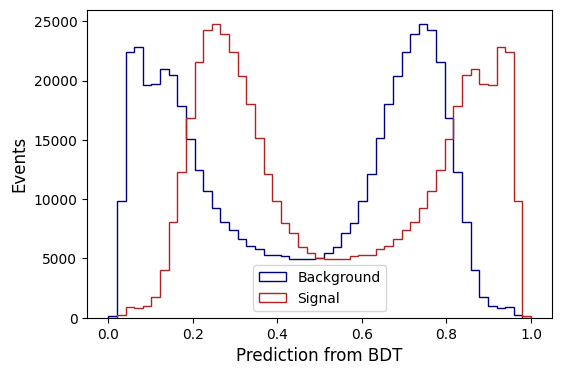

In [87]:
prob_back = y_pred[:, 0]
prob_sign = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_back, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Background')
plt.hist(prob_sign, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

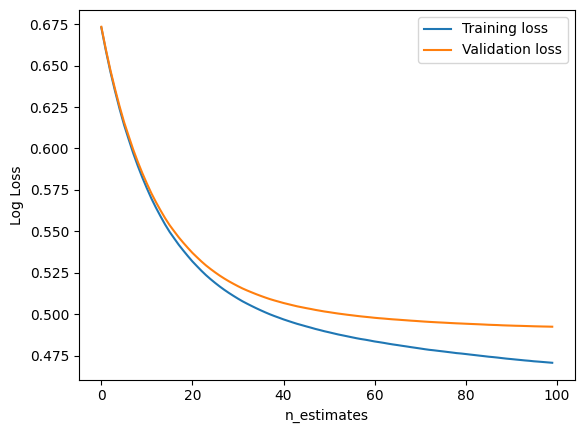

In [88]:
log_losses_train = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss_train = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses_train.append(loss_train)

log_losses_test = []
for y_pred in gbc.staged_predict_proba(X_test):
    loss_test = sklearn.metrics.log_loss(y_test, y_pred)
    log_losses_test.append(loss_test)

plt.plot(log_losses_train, label='Training loss')
plt.plot(log_losses_test, label='Validation loss')
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

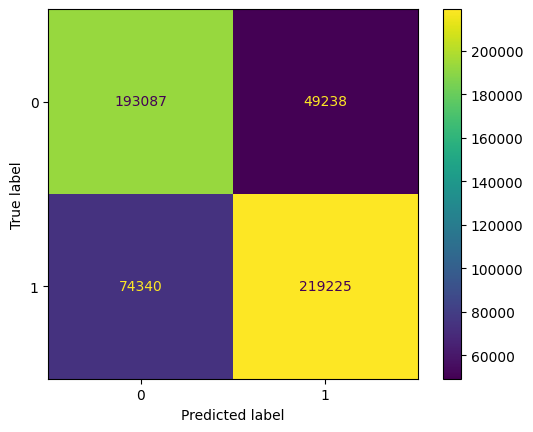

In [89]:
y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

AUC score:  0.837204002243459


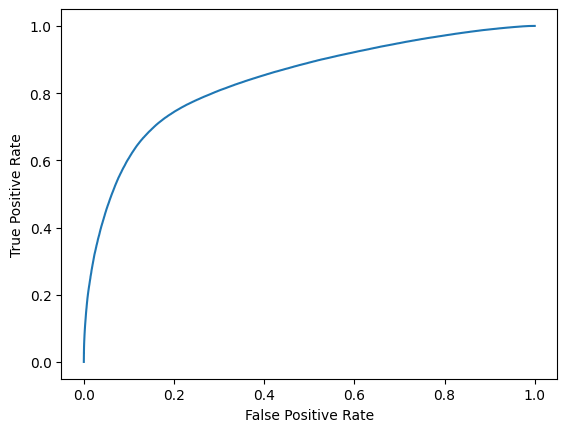

In [90]:
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

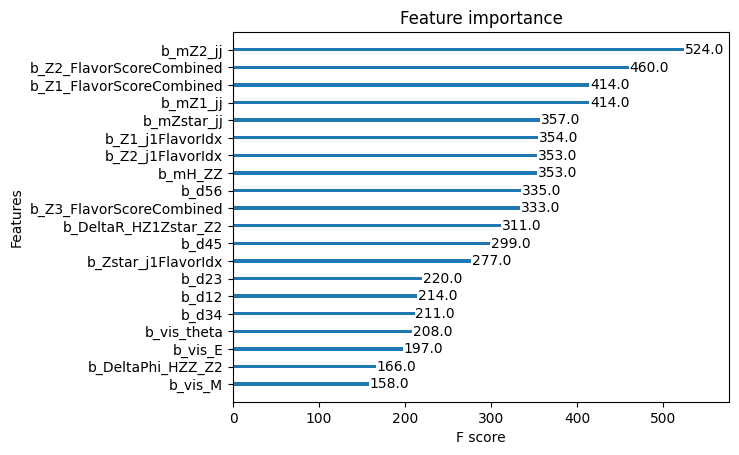

In [91]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)

#### Four background files

In [92]:
back1 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root'
back2 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root'
back3 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root'
back4 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root'
back5 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root'
signal_file = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'

# background
#back_file = [back1, back2, back3, back4, back5]
back_file = [back1, back2, back3, back4]
combined_background_df = pd.DataFrame()

for b in back_file: 
    # opening all the background files
    background = uproot.open(b)
    background_tree = background["analysis"]
    background_df = background_tree.arrays(background_tree.keys(), library="pd")
    background_df['Label'] = 0
        
    # combining all background files
    combined_background_df = pd.concat([background_df, combined_background_df])

# signal
signal = uproot.open(signal_file)
signal_tree = signal["analysis"]
signal_df = signal_tree.arrays(signal_tree.keys(), library="pd")
signal_df['Label'] = 1

# combining those two dataframes into one dataframe
df = pd.concat([combined_background_df, signal_df])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.35, random_state = 15)

# training dataset - separating data vs training columns - but without b_w
X_train = train.drop(columns=['b_w', 'Label'])
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test.drop(columns=['b_w', 'Label'])
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05, random_state = 15, max_features = 5, max_depth = 10, verbose = 1)
gbc.fit(X_train, y_train)

y_pred = gbc.predict_proba(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3585           19.09m
         2           1.3353           20.17m
         3           1.3145           19.57m
         4           1.2955           19.26m
         5           1.2777           19.10m
         6           1.2615           18.93m
         7           1.2465           18.66m
         8           1.2325           18.18m
         9           1.2197           17.87m
        10           1.2081           17.68m
        20           1.1279           15.70m
        30           1.0878           13.70m
        40           1.0649           11.73m
        50           1.0501            9.82m
        60           1.0397            7.88m
        70           1.0318            5.91m
        80           1.0252            3.95m
        90           1.0196            1.98m
       100           1.0146            0.00s


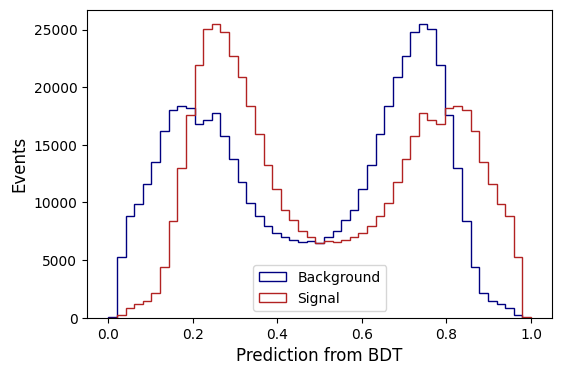

In [93]:
prob_back = y_pred[:, 0]
prob_sign = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_back, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Background')
plt.hist(prob_sign, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

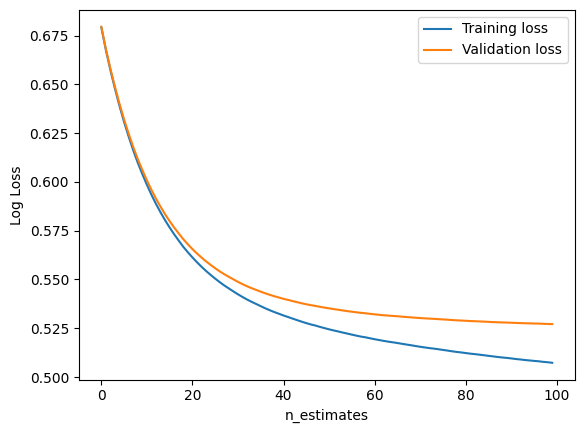

In [94]:
log_losses_train = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss_train = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses_train.append(loss_train)

log_losses_test = []
for y_pred in gbc.staged_predict_proba(X_test):
    loss_test = sklearn.metrics.log_loss(y_test, y_pred)
    log_losses_test.append(loss_test)

plt.plot(log_losses_train, label='Training loss')
plt.plot(log_losses_test, label='Validation loss')
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

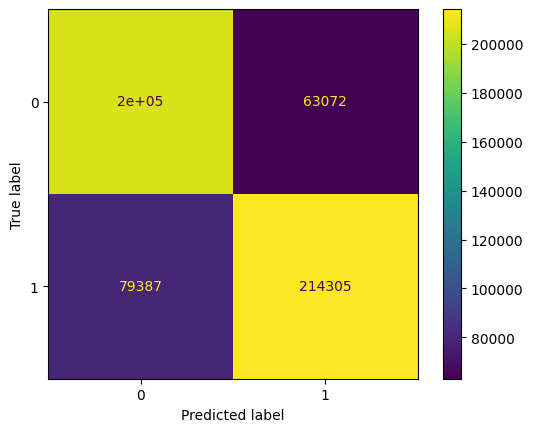

In [95]:
y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

AUC score:  0.8126338843922425


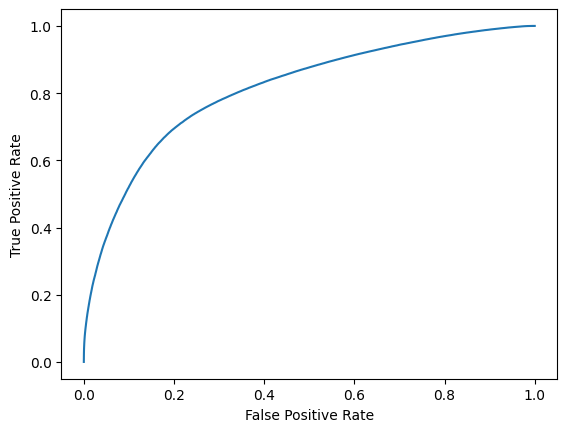

In [96]:
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

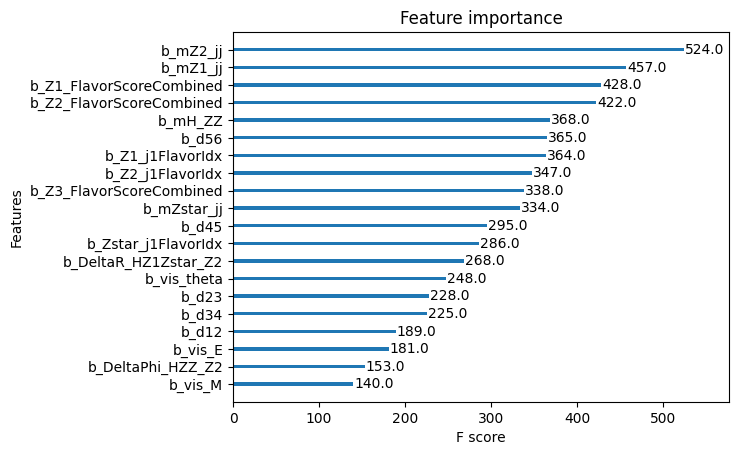

In [97]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)

#### Plotting all 6 files onto each other to see where similarities lie

In [112]:
import uproot 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def Plot_Variable_Together(files, variable):
    
    # Make the plot
    fig, ax = plt.subplots(1, figsize=(5, 3), dpi=150)
    
    xmin, nbins = 0, 40 # set binning
    label_dict = {
        "b_mH_ZZ": ['mH_ZZ (GeV)'],
        "b_mZ1_jj": ['mZ1_jj (GeV)'],
        "b_mZ2_jj": ['mZ2_jj (GeV)'],
        "b_mZstar_jj": ['mZstar_jj (GeV)'],
        "b_Z1_j1FlavorIdx": ['Z1_j1FlavorIdx'],
        "b_Z1_j2FlavorIdx": ['Z1_j2FlavorIdx'],
        "b_Z1_FlavorScoreCombined": ['Z1_FlavorScoreCombined'],
        "b_Z2_FlavorScoreCombined": ['Z2_FlavorScoreCombined'],
        "b_Z3_FlavorScoreCombined": ['Z3_FlavorScoreCombined'],
        "b_Z2_j1FlavorIdx": ['Z2_j1FlavorIdx'],
        "b_Z2_j2FlavorIdx": ['Z2_j2FlavorIdx'],
        "b_Zstar_j1FlavorIdx": ['Zstar_j1FlavorIdx'],
        "b_Zstar_j2FlavorIdx": ['Zstar_j2FlavorIdx'],
        "b_DeltaR_HZ1Zstar_Z2": ['DeltaR_HZ1Zstar_Z2'],
        "b_DeltaPhi_HZZ_Z2": ['DeltaPhi_HZZ_Z2 (rad)'],
        "b_d12": ['d12 ( )'],
        "b_d23": ['d23 ( )'],
        "b_d34": ['d34 ( )'],
        "b_d45": ['d45 ( )'],
        "b_d56": ['d56 ( )'],
        "b_vis_E": ['vis_E (GeV)'],
        "b_vis_M": ['vis_M (GeV)'],
        "b_vis_theta": ['vis_theta (rad)']
    }

    nevents = 2000
    ylabel = "Entries"
    normalize = 1
    x_info = label_dict[variable]
    xlabel = x_info[0]

    # For each file, add its histogram to the plot
    for f in files:    
        u_f = uproot.open(f) # open file with uproot
        tree = u_f["analysis"] # define events tree
        #t.keys() # print all branches # print all branches

        array = tree[variable].array(library="pd")
        xmax = max(array) * 1.025

        #takes all that is in the "variable" from the branch and arranges it into a numpy array
        variable_values = tree[variable].array(library="np")
        variable_values = variable_values[:nevents] # take first nevents only
        variable_values = variable_values.flatten()
        #variable_values = np.concatenate(variable_values).ravel() # Flatten the array of arrays

        bins = np.linspace(xmin, xmax, nbins)  
        counts, bins = np.histogram(variable_values, bins=bins)
        avg, stdev = np.mean(variable_values), np.std(variable_values) # save average and standard deviation
        if(normalize): 
            counts = [c/nevents for c in counts]
            ylabel = "Entries (normalized)"
        
        if f == '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root':
            legend_entry = 'Signal'
            ax.hist(bins[:-1], bins, weights=counts, label = legend_entry, histtype='step', color='red')
        else:
            legend_entry = 'Background'
            ax.hist(bins[:-1], bins, weights=counts, label = legend_entry, histtype='step', color='blue')

    fontsize = 13
    # Set axis labels with custom font size - 
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize) # make the tick label sizes larger as well, so that others will be able to see when you share the plot
    plt.legend(fontsize = 4, loc = 'upper right')
    
    fig.tight_layout()
    fig.show()

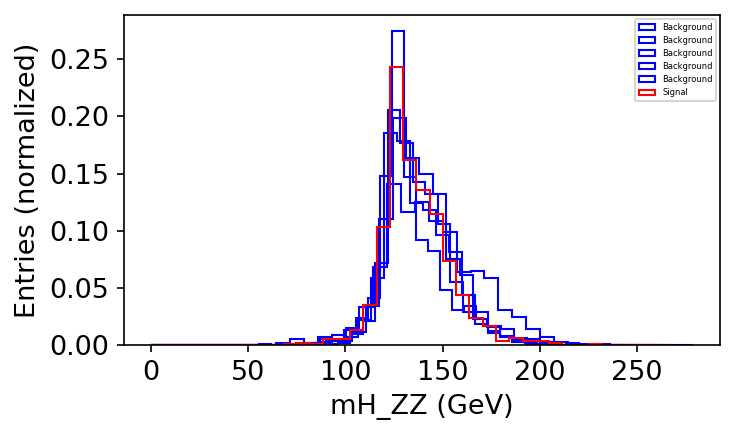

In [113]:
Plot_Variable_Together(['/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root', '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root', '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root', '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root', '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root', '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'], 'b_mH_ZZ')

#### Trying to resample so dataset not as unbalanced

In [117]:
from sklearn.utils import resample

back1 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root'
back2 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root'
back3 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root'
back4 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root'
back5 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root'
signal_file = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'

# background
back_file = [back1, back2, back3, back4, back5]
combined_background_df = pd.DataFrame()

for b in back_file: 
    # opening all the background files
    background = uproot.open(b)
    background_tree = background["analysis"]
    background_df = background_tree.arrays(background_tree.keys(), library="pd")
    background_df['Label'] = 0
        
    # combining all background files
    combined_background_df = pd.concat([background_df, combined_background_df])

# signal
signal = uproot.open(signal_file)
signal_tree = signal["analysis"]
signal_df = signal_tree.arrays(signal_tree.keys(), library="pd")
signal_df['Label'] = 1

background_downsampled = resample(combined_background_df, replace=False, n_samples=len(signal_df), random_state=15)

# combining those two dataframes into one dataframe
df = pd.concat([background_downsampled, signal_df])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.35, random_state = 15, stratify=df['Label'])

# training dataset - separating data vs training columns - but without b_w
X_train = train.drop(columns=['b_w', 'Label'])
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test.drop(columns=['b_w', 'Label'])
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05, random_state = 15, max_features = 5, max_depth = 10, verbose = 1)
gbc.fit(X_train, y_train)

y_pred = gbc.predict_proba(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3642           21.16m
         2           1.3433           21.13m
         3           1.3244           20.56m
         4           1.3078           20.55m
         5           1.2917           20.34m
         6           1.2773           20.34m
         7           1.2641           20.03m
         8           1.2516           19.77m
         9           1.2401           19.49m
        10           1.2295           19.22m
        20           1.1584           17.11m
        30           1.1220           15.01m
        40           1.1009           12.86m
        50           1.0873           10.72m
        60           1.0775            8.56m
        70           1.0697            6.45m
        80           1.0636            4.29m
        90           1.0583            2.14m
       100           1.0537            0.00s


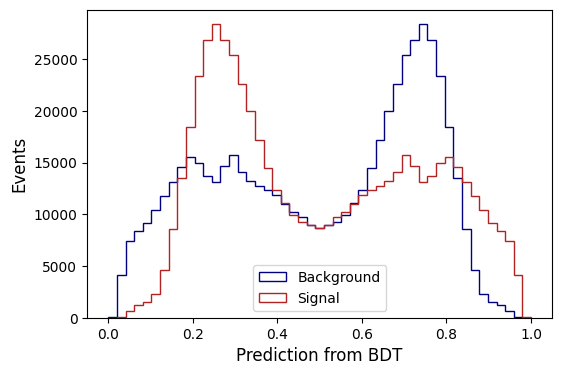

In [118]:
prob_back = y_pred[:, 0]
prob_sign = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_back, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Background')
plt.hist(prob_sign, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

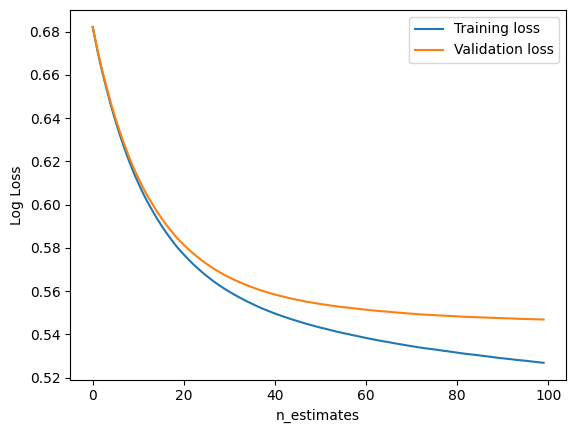

In [119]:
log_losses_train = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss_train = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses_train.append(loss_train)

log_losses_test = []
for y_pred in gbc.staged_predict_proba(X_test):
    loss_test = sklearn.metrics.log_loss(y_test, y_pred)
    log_losses_test.append(loss_test)

plt.plot(log_losses_train, label='Training loss')
plt.plot(log_losses_test, label='Validation loss')
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

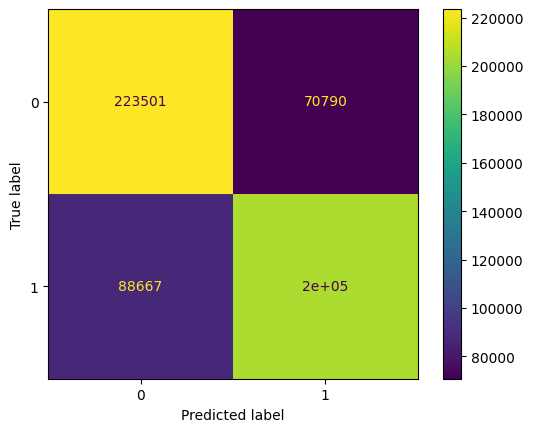

In [120]:
y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

AUC score:  0.7951151852627665


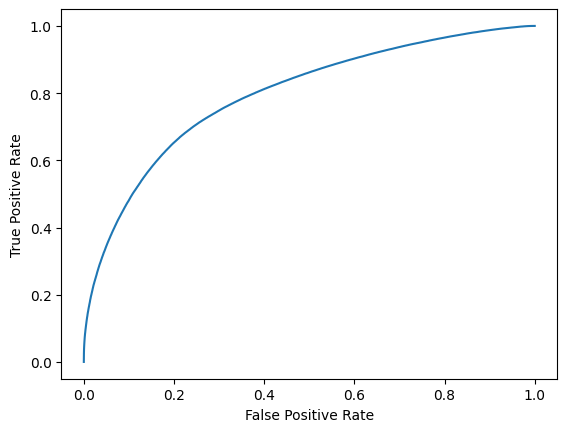

In [121]:
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

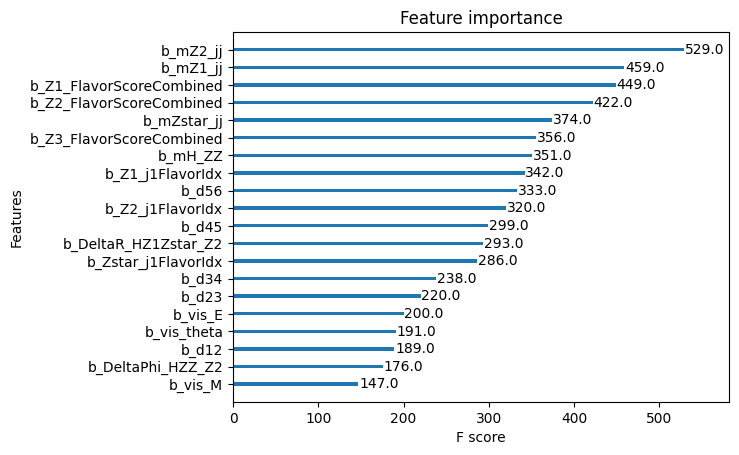

In [122]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)